# Wiggle nuclei
In this notebook we move the positions of nuclei artifically to afterwards segment them again and draw a mesh between them. The mesh will change more or less depending on how much we modify the nuclei positions randomly.

In [1]:
# !pip install napari-animated-gif-io pyclesperanto-prototype stackview

In [2]:
import numpy as np
import pyclesperanto_prototype as cle
from napari_animated_gif_io._function import save_as_animated_gif

cle.select_device("tx")


<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

## Load data
Tribolium castaneum, nuclei-GFP transgenic line, cropped. Image data source: Daniela Vorkel, Myers lab, MPI-CBG / CSBD
    
https://github.com/clEsperanto/clesperanto_example_data/blob/main/Lund_000500_resampled-cropped.tif

cl.OCLArray([[[144., 142., 145., ..., 140., 138., 137.],
        [145., 142., 143., ..., 141., 139., 138.],
        [142., 139., 141., ..., 140., 139., 142.],
        ...,
        [256., 252., 260., ..., 308., 287., 273.],
        [253., 249., 253., ..., 319., 298., 278.],
        [256., 255., 253., ..., 322., 296., 273.]],

       [[143., 140., 145., ..., 139., 139., 137.],
        [145., 139., 144., ..., 140., 140., 138.],
        [143., 140., 142., ..., 141., 140., 141.],
        ...,
        [255., 255., 263., ..., 314., 292., 274.],
        [255., 250., 251., ..., 328., 302., 277.],
        [257., 253., 250., ..., 329., 298., 272.]],

       [[143., 139., 145., ..., 139., 139., 137.],
        [145., 138., 145., ..., 139., 141., 137.],
        [143., 140., 142., ..., 142., 141., 141.],
        ...,
        [254., 257., 265., ..., 316., 293., 272.],
        [255., 251., 250., ..., 330., 302., 274.],
        [257., 251., 248., ..., 332., 298., 270.]],

       ...,

       [[137., 138., 140., ..., 128., 127., 129.],
        [140., 140., 137., ..., 131., 127., 129.],
        [140., 138., 138., ..., 129., 130., 133.],
        ...,
        [177., 182., 181., ..., 160., 161., 161.],
        [179., 185., 186., ..., 162., 157., 158.],
        [181., 179., 184., ..., 158., 157., 160.]],

       [[136., 138., 141., ..., 127., 127., 129.],
        [139., 139., 136., ..., 131., 127., 129.],
        [140., 137., 138., ..., 127., 128., 134.],
        ...,
        [175., 179., 179., ..., 158., 159., 159.],
        [177., 182., 184., ..., 162., 155., 158.],
        [180., 174., 180., ..., 158., 157., 158.]],

       [[136., 136., 139., ..., 129., 129., 129.],
        [137., 137., 135., ..., 130., 128., 128.],
        [138., 135., 136., ..., 128., 130., 132.],
        ...,
        [174., 176., 177., ..., 159., 157., 157.],
        [179., 180., 180., ..., 160., 154., 156.],
        [178., 174., 177., ..., 158., 156., 157.]]], dtype=float32)
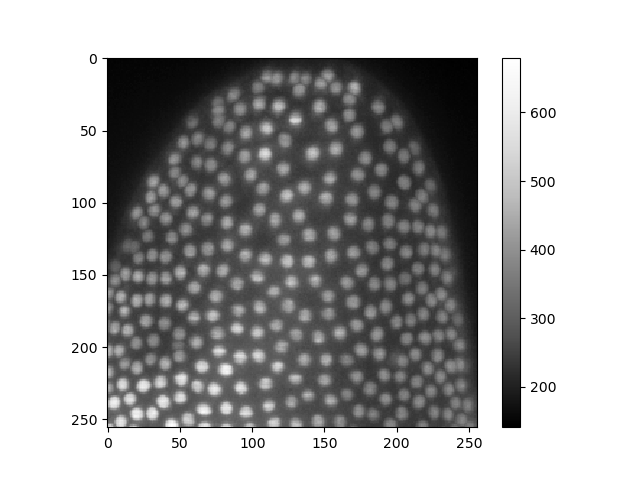
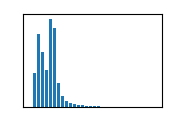

In [3]:
image = cle.imread("../../../clesperanto_example_data/Lund_000500_resampled-cropped.tif")
image

## Segment nuclei

cl.OCLArray([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 285, 285,   0],
        [  0,   0,   0, ..., 285, 285,   0],
        [  0,   0,   0, ..., 285, 285,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 285, 285,   0],
        [  0,   0,   0, ..., 285, 285,   0],
        [  0,   0,   0, ..., 285, 285,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 285,   0,   0],
        [  0,   0,   0, ..., 285, 285,   0],
        [  0,   0,   0, ..., 285, 285,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]]], dtype=uint32)
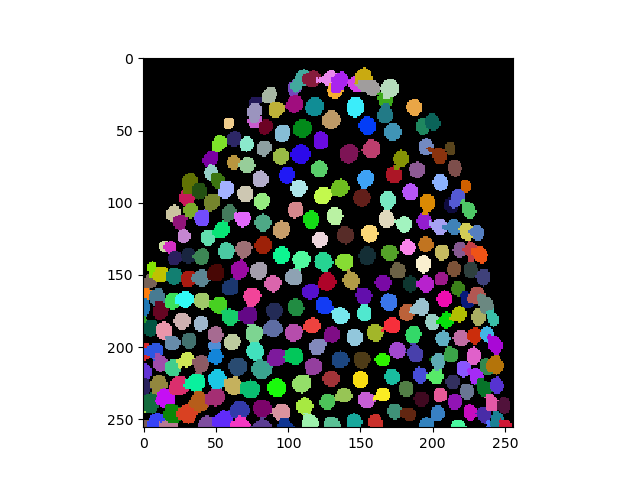

In [4]:
nuclei = cle.voronoi_otsu_labeling(cle.top_hat_box(image, radius_x=5, radius_y=5), spot_sigma=1)
nuclei


In [5]:
def move_stuff_around(image, nuclei, distance=1):
    """
    Randomly move positions of given nuclei by applying a vector field to the image.
    """
    centroids = cle.reduce_labels_to_centroids(nuclei)
    num_nuclei = nuclei.max()
    
    vector_field_x = make_random_vector_field(nuclei, distance)
    vector_field_y = make_random_vector_field(nuclei, distance)
    vector_field_z = make_random_vector_field(nuclei, distance)

    return cle.apply_vector_field(image, vector_field_x, vector_field_y, vector_field_z)
    

def make_random_vector_field(nuclei, distance):
    """
    Renerate a vector field from a label image by randomly introducing shift according to a given distance.
    """
    random_shifts = (np.random.random((1, int(num_nuclei + 1))) * 2 -1) * distance
    random_shifts[0,0] = 0 # keep background where it is

    vector_field_sharp = cle.replace_intensities(nuclei, random_shifts)
    sigma = 10
    return cle.gaussian_blur(vector_field_sharp, sigma_x=sigma, sigma_y=sigma, sigma_z=sigma)


In [6]:
num_nuclei = nuclei.max()
num_nuclei

285.0

In [7]:
def analyze(image, nuclei):

    image_to_analyze = move_stuff_around(image, nuclei, distance=10)
    
    specific_nuclei = cle.voronoi_otsu_labeling(cle.top_hat_box(image_to_analyze, radius_x=5, radius_y=5), spot_sigma=1)
    
    mesh = cle.draw_mesh_between_proximal_labels(specific_nuclei, maximum_distance=25)
    
    
    return mesh * image_to_analyze.max()/4 + image_to_analyze
    

In [8]:
images = np.asarray([cle.maximum_z_projection(analyze(image, nuclei)) for i in range(10)])

In [9]:
save_as_animated_gif(images, "visualization.gif")

Lossy conversion from float32 to uint8. Range [141.0, 813.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [141.0, 813.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [141.0, 812.25]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [141.0, 813.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [141.0, 805.25]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [141.0, 813.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [141.0, 813.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [141.0, 813.0]. Convert image to uint8 prior to saving to suppr

![](visualization.gif)

In [10]:
import stackview
stackview.slice(np.asarray(images), continuous_update=True) 